In [1]:
import os
import h5py

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

import torch
import torch.nn as nn
import torchvision
from torch.utils import data
import heidel_utils
from importlib import reload # reload 
reload(heidel_utils)


<module 'heidel_utils' from '/Users/kerstjens/msc_thesis/msc_thesis/heidel_utils.py'>

In [2]:
from LIFlayer import OneRecHiddenModel

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'device: {device}')
else:
    device = torch.device("cpu")
    print(f'device: {device}')

device: cuda


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from modularities_notebooks.modularity import clustered_connections, print_weight_matrix, compute_density_matrix, plot_connection_matrices
from sklearn.preprocessing import StandardScaler

N = 200
n_assemblies = 4
epsilon =1
base_w = 1
w_scale = [10]
w = 1
ss = StandardScaler()
mask, cluster_ids, _ = clustered_connections(n_neurons=N, n_clusters=n_assemblies, density=1./n_assemblies, modularity=1.)
mask = (mask* (base_w*w)) + base_w

W, cluster_ids, t = clustered_connections(n_neurons=N, n_clusters=n_assemblies, density=epsilon, modularity=0.)
if w > 0.:
    W *= base_w
    W *= mask
W2 = (W != 0).astype(int)
W = W-1
W = torch.tensor(W,device=device)
W2 = torch.tensor(W2,device=device)

In [ ]:
#from collections import namedtuple
#NeuronState = namedtuple('NeuronState', ['U', 'I', 'S'])
#class LIFDensePopulation(nn.Module):
#    # NeuronState = namedtuple('NeuronState', ['U', 'I', 'S'])
#    def __init__(self, in_channels, out_channels,device='cpu', bias=True, alpha = .9, beta=.85, batch_size=10,W=None):
#        super(LIFDensePopulation, self).__init__()
#        self.fc_layer = nn.Linear(in_channels, out_channels)
#        self.in_channels = in_channels
#        self.device = device
#        self.out_channels = out_channels
#        self.batch_size = batch_size
#        self.weight_scale = 0.2
#        self.alpha = alpha
#        self.beta = beta
#        self.state = NeuronState(U=torch.zeros(batch_size, out_channels).to(self.device),
#                                 I=torch.zeros(batch_size, out_channels).to(self.device),
#                                 S=torch.zeros(batch_size, out_channels).to(self.device))
#        self.NeuronState = self.state
#        self.fc_layer.weight.data.normal_(mean=0.0, std=self.weight_scale/np.sqrt(in_channels))
#        #torch.nn.init.normal_(self.fc_layer.weight.data, mean=0.0, std=self.weight_scale/np.sqrt(nb_inputs))
#        self.fc_layer.bias.data.uniform_(-.01, .01)
#
#
#    def forward(self, Sin_t):
#        state = self.state
#        U = self.alpha*state.U + state.I - state.S #mem
#        I = self.beta*state.I + self.fc_layer(Sin_t) #syn
#        # update the neuronal state
#        S = smooth_step(U)
#        self.state = NeuronState(U=U, I=I, S=S)
#        self.NeuronState = self.state
#        #state = NeuronState(U=U, I=I, S=S)
#        return self.state
#
#    def init_state(self):
#
#        out_channels = self.out_channels
#        self.state = NeuronState(U=torch.zeros(self.batch_size, out_channels,device=self.device),
#                                 I=torch.zeros(self.batch_size, out_channels,device=self.device),
#                                 S=torch.zeros(self.batch_size, out_channels,device=self.device))
#        self.NeuronState = self.state
#
#    def init_mod_weights(self,W):
#        self.fc_layer.weight = torch.nn.Parameter(self.fc_layer.weight.data * torch.tensor(W,dtype=float))
#        
#class LifRecPopulation(nn.Module):
#    # NeuronState = namedtuple('NeuronState', ['U', 'I', 'S'])
#    def __init__(self, in_channels, out_channels, bias=True, alpha = .9, beta=.85, batch_size=10,W=None,device='cpu'):
#        super(LifRecPopulation, self).__init__()
#        self.fc_layer = nn.Linear(in_channels, out_channels)
#        self.rec_layer = nn.Linear(out_channels, out_channels)
#        self.in_channels = in_channels
#        self.out_channels = out_channels
#        self.batch_size = batch_size
#        self.device = device
#        self.weight_scale = 0.2
#        self.alpha = alpha
#        self.beta = beta
#        self.state = NeuronState(U=torch.zeros(batch_size, out_channels).to(self.device),
#                                 I=torch.zeros(batch_size, out_channels).to(self.device),
#                                 S=torch.zeros(batch_size, out_channels).to(self.device))
#        self.NeuronState = self.state
#        #torch.nn.init.normal_(self.fc_layer.weight.data, mean=0.0, std=self.weight_scale/np.sqrt(nb_inputs))
#        self.fc_layer.weight.data.normal_(mean=0.0, std=self.weight_scale/np.sqrt(in_channels))
#        self.fc_layer.bias.data.uniform_(-.01, .01)
#        #torch.nn.init.normal_(self.rec_layer.weight.data, mean=0.0, std=self.weight_scale/np.sqrt(nb_inputs))
#        self.rec_layer.bias.data.uniform_(-.01, .01)
#        self.rec_layer.weight.data.normal_(mean=0.0, std=self.weight_scale/np.sqrt(in_channels))
#
#
#    def forward(self, Sin_t):
#        state = self.state
#        U = self.alpha*state.U + state.I - state.S.detach() #mem
#        I = self.beta*state.I + self.fc_layer(Sin_t) + self.rec_layer(state.S) #syn
#        # update the neuronal state
#        S = smooth_step(U)
#        self.state = NeuronState(U=U, I=I, S=S)
#        self.NeuronState = self.state
#        #state = NeuronState(U=U, I=I, S=S)
#        return self.state
#
#    def init_state(self):
#
#        out_channels = self.out_channels
#        self.state = NeuronState(U=torch.zeros(self.batch_size, out_channels,device=device),
#                                 I=torch.zeros(self.batch_size, out_channels,device=device),
#                                 S=torch.zeros(self.batch_size, out_channels,device=device))
#        self.NeuronState = self.state
#
#    def init_mod_weights(self,W):
#        self.fc_layer.weight = torch.nn.Parameter(self.fc_layer.weight.data * torch.tensor(W))
#
#class SmoothStep(torch.autograd.Function):
#    '''
#    Modified from: https://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_custom_function.html
#    '''
#    scale = 100.0
#    @staticmethod
#    def forward(aux, x):
#        """
#        In the forward pass we compute a step function of the input Tensor
#        and return it. ctx is a context object that we use to stash information which
#        we need to later backpropagate our error signals. To achieve this we use the
#        ctx.save_for_backward method.
#        """
#        aux.save_for_backward(x)
#        out = torch.zeros_like(x)
#
#        out[x > 0] = 1.0
#        return out
#
#    def backward(aux, grad_output):
#        
#        #grad_input = grad_output.clone()
#        input, = aux.saved_tensors
#        grad_input = grad_output.clone()
#        grad = grad_input/(SmoothStep.scale*torch.abs(input)+1.0)**2
#        return grad
#smooth_step = SmoothStep().apply
#
#class OneHiddenModel(nn.Module):
#
#    def __init__(self,in_channels,hidden_channels,out_channels,batch_size,alpha=.9,beta=.85,device='cpu',W=None):
#        super(OneHiddenModel, self).__init__()
#
#        self.in_channels = in_channels
#        self.hidden_channels = hidden_channels
#        self.out_channels = out_channels
#        self.alpha = alpha
#        self.beta = beta
#        self.batch_size = batch_size
#        self.device = device
#        self.W = W
#        self.layer1 = LIFDensePopulation(in_channels=self.in_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size,W=W).to(device)
#        self.layer2 = LIFDensePopulation(in_channels=self.hidden_channels,out_channels=self.out_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#
#    def forward(self,Sin):
#        hidden = self.layer1(Sin)
#        out = self.layer2(hidden.S)
#        return out
#
#    def init_states(self):
#        self.layer1.init_state()
#        self.layer2.init_state()
#
#    def init_mod_weights(self,W):
#        self.layer1.fc_layer.weight = torch.nn.Parameter(self.layer1.fc_layer.weight.data * torch.Tensor(W))
#
#class OneRecHiddenModel(nn.Module):
#
#    def __init__(self,in_channels,hidden_channels,out_channels,batch_size,alpha=.9,beta=.85,device='cpu',W=None):
#        super(OneRecHiddenModel, self).__init__()
#
#        self.in_channels = in_channels
#        self.hidden_channels = hidden_channels
#        self.out_channels = out_channels
#        self.alpha = alpha
#        self.beta = beta
#        self.batch_size = batch_size
#        self.device = device
#        self.W = W
#        self.layer1 = LIFDensePopulation(in_channels=self.in_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size,W=W).to(device)
#        self.layer2 = LifRecPopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size,W=W).to(device)
#        self.layer3 = LIFDensePopulation(in_channels=self.hidden_channels,out_channels=self.out_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#
#    def forward(self,Sin):
#        hidden1 = self.layer1(Sin)
#        hidden2 = self.layer2(hidden1.S)
#        out = self.layer3(hidden2.S)
#        return out
#
#    def init_states(self):
#        self.layer1.init_state()
#        self.layer2.init_state()
#        self.layer3.init_state()
#
#    def init_mod_weights(self,W):
#        self.layer2.fc_layer.weight = torch.nn.Parameter((self.layer2.fc_layer.weight.data * W).to(torch.float32))
#
#class ThreeHiddenModel(nn.Module):
#
#    def __init__(self,in_channels,hidden_channels,out_channels,batch_size,alpha=.9,beta=.85,device='cpu',W=None):
#        super(ThreeHiddenModel, self).__init__()
#
#        self.in_channels = in_channels
#        self.hidden_channels = hidden_channels
#        self.out_channels = out_channels
#        self.alpha = alpha
#        self.beta = beta
#        self.batch_size = batch_size
#        self.device = device
#        self.W = W
#        self.layer1 = LIFDensePopulation(in_channels=self.in_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size,W=W).to(device)
#        self.layer2 = LIFDensePopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        self.layer3 = LIFDensePopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        self.layer4 = LIFDensePopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        self.layer5 = LIFDensePopulation(in_channels=self.hidden_channels,out_channels=self.out_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#
#    def forward(self,Sin):
#        hidden1 = self.layer1(Sin)
#        hidden2 = self.layer2(hidden1.S)
#        hidden3 = self.layer3(hidden2.S)
#        hidden4 = self.layer4(hidden3.S)
#        out = self.layer5(hidden4.S)
#        return out
#
#    def init_states(self):
#        self.layer1.init_state()
#        self.layer2.init_state()
#        self.layer3.init_state()
#        self.layer4.init_state()
#        self.layer5.init_state()
#
#    def init_mod_weights(self,W):
#        self.layer1.fc_layer.weight = torch.nn.Parameter(self.layer1.fc_layer.weight.data * torch.Tensor(W))
#        self.layer2.fc_layer.weight = torch.nn.Parameter(self.layer2.fc_layer.weight.data * torch.Tensor(W))
#        self.layer3.fc_layer.weight = torch.nn.Parameter(self.layer3.fc_layer.weight.data * torch.Tensor(W))
#        self.layer4.fc_layer.weight = torch.nn.Parameter(self.layer4.fc_layer.weight.data * torch.Tensor(W))
#
#
#class FiveHiddenModel(nn.Module):
#
#    def __init__(self,in_channels,hidden_channels,out_channels,batch_size,alpha=.9,beta=.85,device='cpu',W=None):
#        super(FiveHiddenModel, self).__init__()
#
#        self.in_channels = in_channels
#        self.hidden_channels = hidden_channels
#        self.out_channels = out_channels
#        self.alpha = alpha
#        self.beta = beta
#        self.batch_size = batch_size
#        self.device = device
#        self.W = W
#        self.layer1 = LIFDensePopulation(in_channels=self.in_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size,W=W).to(device)
#        self.layer2 = LIFDensePopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        self.layer3 = LIFDensePopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        self.layer4 = LIFDensePopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        self.layer5 = LIFDensePopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                        alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        self.layer6 = LIFDensePopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        self.layer7 = LIFDensePopulation(in_channels=self.hidden_channels,out_channels=self.out_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        #maybe try last layer non- spiking
#
#    def forward(self,Sin):
#        hidden1 = self.layer1(Sin)
#        hidden2 = self.layer2(hidden1.S)
#        hidden3 = self.layer3(hidden2.S)
#        hidden4 = self.layer4(hidden3.S)
#        hidden5 = self.layer5(hidden4.S)
#        hidden6 = self.layer6(hidden5.S)
#        out = self.layer7(hidden6.S)
#        return out
#
#    def init_states(self):
#        self.layer1.init_state()
#        self.layer2.init_state()
#        self.layer3.init_state()
#        self.layer4.init_state()
#        self.layer5.init_state()
#        self.layer6.init_state()
#        self.layer7.init_state()
#
#    def init_mod_weights(self,W):
#        self.layer1.fc_layer.weight = torch.nn.Parameter(self.layer1.fc_layer.weight.data * W)
#        self.layer2.fc_layer.weight = torch.nn.Parameter(self.layer2.fc_layer.weight.data * W)
#        self.layer3.fc_layer.weight = torch.nn.Parameter(self.layer3.fc_layer.weight.data * W)
#        self.layer4.fc_layer.weight = torch.nn.Parameter(self.layer4.fc_layer.weight.data * W)
#        self.layer5.fc_layer.weight = torch.nn.Parameter(self.layer5.fc_layer.weight.data * W)
#        self.layer6.fc_layer.weight = torch.nn.Parameter(self.layer6.fc_layer.weight.data * W)
#class FiveRecHiddenModel(nn.Module):
#
#    def __init__(self,in_channels,hidden_channels,out_channels,batch_size,alpha=.9,beta=.85,device='cpu',W=None):
#        super(FiveRecHiddenModel, self).__init__()
#
#        self.in_channels = in_channels
#        self.hidden_channels = hidden_channels
#        self.out_channels = out_channels
#        self.alpha = alpha
#        self.beta = beta
#        self.batch_size = batch_size
#        self.device = device
#        self.W = W
#        self.layer1 = LIFDensePopulation(in_channels=self.in_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size,W=W).to(device)
#        self.layer2 = LifRecPopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        self.layer3 = LifRecPopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        self.layer4 = LifRecPopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        self.layer5 = LifRecPopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                        alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        self.layer6 = LifRecPopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        self.layer7 = LIFDensePopulation(in_channels=self.hidden_channels,out_channels=self.out_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        #maybe try last layer non- spiking
#
#    def forward(self,Sin):
#        hidden1 = self.layer1(Sin)
#        hidden2 = self.layer2(hidden1.S)
#        hidden3 = self.layer3(hidden2.S)
#        hidden4 = self.layer4(hidden3.S)
#        hidden5 = self.layer5(hidden4.S)
#        hidden6 = self.layer6(hidden5.S)
#        out = self.layer7(hidden6.S)
#        return out
#
#    def init_states(self):
#        self.layer1.init_state()
#        self.layer2.init_state()
#        self.layer3.init_state()
#        self.layer4.init_state()
#        self.layer5.init_state()
#        self.layer6.init_state()
#        self.layer7.init_state()
#
#    def init_mod_weights(self,W):
#        #self.layer1.fc_layer.weight = torch.nn.Parameter(self.layer1.fc_layer.weight.data * torch.Tensor(W))
#        self.layer2.fc_layer.weight = torch.nn.Parameter((self.layer2.fc_layer.weight.data * W).to(torch.float32))
#        self.layer3.fc_layer.weight = torch.nn.Parameter((self.layer3.fc_layer.weight.data * W).to(torch.float32))
#        self.layer4.fc_layer.weight = torch.nn.Parameter((self.layer4.fc_layer.weight.data * W).to(torch.float32))
#        self.layer5.fc_layer.weight = torch.nn.Parameter((self.layer5.fc_layer.weight.data * W).to(torch.float32))
#        #self.layer6.fc_layer.weight = torch.nn.Parameter(self.layer6.fc_layer.weight.data * torch.Tensor(W))
#
#class TwoRecHiddenModel(nn.Module):
#
#    def __init__(self,in_channels,hidden_channels,out_channels,batch_size,alpha=.9,beta=.85,device='cpu',W=None):
#        super(TwoRecHiddenModel, self).__init__()
#
#        self.in_channels = in_channels
#        self.hidden_channels = hidden_channels
#        self.out_channels = out_channels
#        self.alpha = alpha
#        self.beta = beta
#        self.batch_size = batch_size
#        self.device = device
#        self.W = W
#        self.layer1 = LIFDensePopulation(in_channels=self.in_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size,W=W).to(device)
#        self.layer2 = LifRecPopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        self.layer3 = LifRecPopulation(in_channels=self.hidden_channels,out_channels=self.hidden_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        self.layer4 = LIFDensePopulation(in_channels=self.hidden_channels,out_channels=self.out_channels,
#                                         alpha=self.alpha,beta=self.beta,batch_size=self.batch_size).to(device)
#        #maybe try last layer non- spiking
#
#    def forward(self,Sin):
#        hidden1 = self.layer1(Sin)
#        hidden2 = self.layer2(hidden1.S)
#        hidden3 = self.layer3(hidden2.S)
#        out = self.layer4(hidden3.S)
#        return out
#
#    def init_states(self):
#        self.layer1.init_state()
#        self.layer2.init_state()
#        self.layer3.init_state()
#        self.layer4.init_state()
#
#    def init_mod_weights(self,W):
#        #self.layer1.fc_layer.weight = torch.nn.Parameter(self.layer1.fc_layer.weight.data * torch.Tensor(W))
#        self.layer2.fc_layer.weight = torch.nn.Parameter((self.layer2.fc_layer.weight.data * W).to(torch.float32))
#        #self.layer6.fc_layer.weight = torch.nn.Parameter(self.layer6.fc_layer.weight.data * torch.Tensor(W))
#
#

In [13]:
nb_inputs  = 700
nb_hidden  = 200
nb_outputs = 20

time_step = 1e-3
nb_steps = 100
max_time = 1.4

batch_size = 128


In [14]:
# Here we load the Dataset
cache_dir = os.path.expanduser("~/data")
cache_subdir = "hdspikes"
heidel_utils.get_shd_dataset(cache_dir, cache_subdir)

train_file = h5py.File(os.path.join(cache_dir, cache_subdir, 'shd_train.h5'), 'r')
test_file = h5py.File(os.path.join(cache_dir, cache_subdir, 'shd_test.h5'), 'r')

x_train = train_file['spikes']
y_train = train_file['labels']
x_test = test_file['spikes']
y_test = test_file['labels']

Available at: /Users/kerstjens/data/hdspikes/shd_train.h5
Available at: /Users/kerstjens/data/hdspikes/shd_test.h5


In [102]:
in_size = 700
hid_size_W = 344
hid_size_OG = 200
out_size = 20
hidden_layers = 5
param_count_OG = in_size * hid_size_OG + (hidden_layers * 2 * hid_size_OG * hid_size_OG) + (out_size * hid_size_OG)
param_count_W = in_size * hid_size_W + (hidden_layers * 2 * hid_size_W * hid_size_W)/4 + (out_size * hid_size_W)
print(f'OG: {param_count_OG}')
print(f'W: {param_count_W}')

hid_size_W

def find_hidden_size(layers,blocks,in_size=700,out_size=20,params_to_match=544000):
    a = layers * 2 / blocks
    b = in_size + out_size
    c = -params_to_match
    d = b ** 2 - (4 * a * c)
    x1 = round((-b - np.sqrt(d))/ ( 2 * a))
    x2 = round((-b + np.sqrt(d))/ ( 2 * a))
    if x1 > 0:
        param_count_OG = params_to_match
        param_count_W = b * x1 + (a * x1 * x1) 


        print(f'Original #parameters: {param_count_OG}')
        print(f'Augmented #parameters: {param_count_W}')
        return x1
    else:
        param_count_OG = params_to_match
        param_count_W = b * x2 + (a * x2 * x2) 


        print(f'Original #parameters: {param_count_OG}')
        print(f'Augmented #parameters: {param_count_W}')
        return x2
    


hidden_size = find_hidden_size(layers=5,blocks=4)


OG: 544000
W: 543520.0
Original #parameters: 544000
Augmented #parameters: 543520.0


In [21]:
W

tensor([[1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 1., 1., 1.]], device='cuda:0', dtype=torch.float64)

In [15]:
def sparse_data_generator_from_hdf5_spikes(X, y, batch_size, nb_steps, nb_units, max_time, shuffle=True):
    """ This generator takes a spike dataset and generates spiking network input as sparse tensors.

    Args:
        X: The data ( sample x event x 2 ) the last dim holds (time,neuron) tuples
        y: The labels
    """

    labels_ = np.array(y,dtype=np.int)
    number_of_batches = len(labels_)//batch_size
    sample_index = np.arange(len(labels_))

    # compute discrete firing times
    firing_times = X['times']
    units_fired = X['units']

    time_bins = np.linspace(0, max_time, num=nb_steps)

    if shuffle:
        np.random.shuffle(sample_index)

    total_batch_count = 0
    counter = 0
    while counter<number_of_batches:
        batch_index = sample_index[batch_size*counter:batch_size*(counter+1)]

        coo = [ [] for i in range(3) ]
        for bc,idx in enumerate(batch_index):
            times = np.digitize(firing_times[idx], time_bins)
            units = units_fired[idx]
            batch = [bc for _ in range(len(times))]

            coo[0].extend(batch)
            coo[1].extend(times)
            coo[2].extend(units)

        i = torch.LongTensor(coo).to(device)
        v = torch.FloatTensor(np.ones(len(coo[0]))).to(device)

        X_batch = torch.sparse.FloatTensor(i, v, torch.Size([batch_size,nb_steps,nb_units])).to(device)
        y_batch = torch.tensor(labels_[batch_index],device=device)

        yield X_batch.to(device=device), y_batch.to(device=device)

        counter += 1

In [16]:
from LIFlayer import OneHiddenModel

In [17]:
batch_size = 128
torch.cuda.memory_allocated()/1000000

0.64

In [23]:
model = OneRecHiddenModel(in_channels=nb_inputs,hidden_channels=200,out_channels=nb_outputs,batch_size=batch_size,W=W,device=device).to(device)

In [24]:
import time

#model = OneRecHiddenModel(in_channels=nb_inputs,hidden_channels=400,out_channels=nb_outputs,batch_size=batch_size,W=W,device=device).to(device)

ce_loss = torch.nn.CrossEntropyLoss().to(device)
#copy_w = model.layer2.fc_layer.weight.data.clone()
#plt.imshow(copy_w.cpu())
model.init_mod_weights(W)
#copy_w = model.layer2.fc_layer.weight.data.clone()
#plt.imshow(copy_w.cpu())
decay = .99
params = model.parameters()
opt = torch.optim.Adamax(params, lr=2e-4, betas=(0.9,0.999)) #lr is the learning rate
#decay = .9

epochs = 100
loss_hist = []
for epoch in range(epochs):
    tic = time.time()
    avg_loss = 0
    model.train()
    sum_acc=0
    count = 0
    local_loss = []
    #batches
    for x,y in sparse_data_generator_from_hdf5_spikes(x_train, y_train, batch_size, nb_steps, nb_units=nb_inputs, max_time=max_time, shuffle=True):
        
        model.init_states()

        Sprobe = torch.zeros((batch_size,model.out_channels),device=device)
        #out = torch.zeros((batch_size,model.out_channels),device=device)
        #out_rec = [out]
        #timesteps
        for n in range(nb_steps):
            #print(torch.cuda.memory_allocated()/1000000)
            out_state = model(x.to_dense()[:,n])
            #out_rec.append(out_state.U)
            #add decay for leakiness
            #collect spikes over time
            Sprobe = decay * Sprobe + out_state.S
        #out_rec = torch.stack(out_rec,dim=1)
        #prediction = torch.max(out_rec,1).values

        prediction = Sprobe
        #if i==0:
        #    print(prediction)

        #accuracy = val_accuracy(prediction,y_train[train_batch_ids[i]])

        #class labels only
        loss = ce_loss(prediction,y)


        #tonic & torch neuromorphic

        loss.backward()
        opt.step()
        opt.zero_grad()
        #model.init_mod_weights(W)
        model.init_mod_weights(W2)
        #sum_acc = sum_acc + accuracy
        #sum_loss = sum_loss + loss
        avg_loss = ((avg_loss * count) + loss)/(count+1)
        count += 1
        local_loss.append(loss.item())
    mean_loss = np.mean(local_loss)
    loss_hist.append(mean_loss)
    #avg_train_acc = sum_acc/(len(train_batch_ids))
    #avg_loss = sum_loss/(len(train_batch_ids))
    #if i == 3:/'
    #loss_hist = loss_hist + [float(avg_loss)]
    #acc_hist = acc_hist + [float(avg_train_acc)]

    toc = time.time()
    print(f'time for epoch {epoch}: {toc-tic}')
    if epoch%1==0:
        print(f'epoch {epoch}: \n loss: {mean_loss}')
        #print(f'train_acc: {avg_train_acc}')
    #val_acc,_,_ = validation_acc(X_test,y_test,model,test_batch_ids)
    #val_acc_hist = val_acc_hist + [val_acc]
    #print(f'val_acc: {val_acc}')



/tmp/ipykernel_1874666/915459707.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels_ = np.array(y,dtype=np.int)


time for epoch 0: 30.21317434310913
epoch 0: 
 loss: 4.531523322302197


KeyboardInterrupt: 

In [26]:
wplot

tensor([[-0.0136, -0.0054,  0.0133,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0296,  0.0068,  0.0055,  ..., -0.0002, -0.0002, -0.0002],
        [ 0.0179, -0.0096,  0.0260,  ...,  0.0002,  0.0002,  0.0002],
        ...,
        [-0.0002, -0.0002, -0.0002,  ...,  0.0262, -0.0142,  0.0065],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0018,  0.0045, -0.0029],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0239, -0.0086,  0.0063]],
       device='cuda:0')

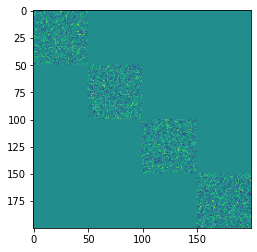

In [25]:
wplot = model.layer2.fc_layer.weight.data.clone()
plt.imshow(wplot.detach().cpu().numpy())

In [10]:
def batch_accuracy(prediction,y):
    return (np.argmax(prediction.detach().cpu().numpy(),axis=1) == y.cpu().numpy()).sum()/128*100

In [11]:
model = OneRecHiddenModel(in_channels=nb_inputs,hidden_channels=nb_hidden,out_channels=nb_outputs,batch_size=batch_size,W=None).to(device)

NameError: name 'nb_inputs' is not defined

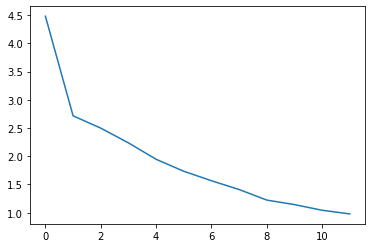

In [18]:
plt.plot(loss_hist)

In [22]:
#torch.save(model.state_dict(), '5_rec_test.pth')
#model = FiveRecHiddenModel(in_channels=nb_inputs,hidden_channels=200,out_channels=nb_outputs,batch_size=batch_size,W=None).to(device)
#model.load_state_dict(torch.load('5_rec_test.pth'))

counter = 0
overall_accuracy = 0
for x,y in sparse_data_generator_from_hdf5_spikes(x_test, y_test, batch_size, nb_steps, nb_units=nb_inputs, max_time=max_time, shuffle=True):
        model.eval()
        model.init_states()

        #Sprobe = torch.zeros((batch_size,model.out_channels),device=device)
        out = torch.zeros((batch_size,model.out_channels),device=device)
        out_rec = [out]
        #timesteps
        for n in range(nb_steps):
            out_state = model(x.to_dense()[:,n])
            out_rec.append(out_state.U)
            #add decay for leakiness
            #collect spikes over time
            #Sprobe = decay * Sprobe + out_state.S
        out_rec = torch.stack(out_rec,dim=1)
        prediction = torch.max(out_rec,1).values

        batch_acc = batch_accuracy(prediction,y)
        overall_accuracy = ((overall_accuracy * counter) + batch_acc) / (counter + 1)
        counter +=1
        print('overall accuracy: {:.4}%'.format(overall_accuracy))
        

        

/tmp/ipykernel_1874353/915459707.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels_ = np.array(y,dtype=np.int)


RuntimeError: CUDA out of memory. Tried to allocate 26.00 MiB (GPU 0; 23.70 GiB total capacity; 6.11 GiB already allocated; 10.56 MiB free; 6.45 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF